# PREVENDO ROTATIVIDADE DE CLIENTES EM AGÊNCIA BANCÁRIA

É fato que bancos buscam constantemente oferecer serviços de qualidade e reter o maior número possível de clientes ativos. Uma preocupação central é entender se as necessidades dos clientes estão sendo atendidas e identificar potenciais clientes considerando mudar para outra instituição. Identificar clientes propensos à mudança permite que o banco adote medidas proativas, como campanhas de marketing personalizadas, visando convencê-los a permanecer.

Neste contexto, nosso objetivo é desenvolver um modelo de previsão preciso para determinar se clientes (dos dados de teste) continuarão sua relação com o banco ou estão ponderando uma possível saída.

Estudos do setor indicam que a retenção de clientes existentes geralmente é mais econômica do que a aquisição de novos. Compreender e antecipar o comportamento do cliente permite que os bancos implementem estratégias que aprimoram a satisfação e a lealdade do cliente, contribuindo para o sucesso e a sustentabilidade da instituição.

## OBJETIVOS

Então vamos colocar em prática, conhecimentos em:
- Análise de dados
- Análise estatística
- Interpretação de gráficos
- Compreensão de negócios
- Pesquisa
- Tratamento de dados
- Modelos de Machine Learning
- Storytelling

## INCLUSÃO

Sempre me preocupo para trazer visualizações bem informativas e bonitas para o leitor e analista, mas, peço perdão por minha desatenção. Acabo esquecendo de pessoas com limitações visuais, como os daltônicos. 

É pensando nisso que utilizarei uma paleta de cores que facilite pelo menos um pouco para essas pessoas e já digo que adotarei outras medidas para tornar meus códigos e projetos acessíveis a todos.🤜🤛🏿

## SOBRE OS DADOS

Trabalharemos com um conjunto de dados contendo informações sobre 10.000 clientes bancários e dentre as variáveis encontradas, estão:

- RowNumber: Número da linha ou índice no conjunto de dados.
- CustomerId: Identificador único do cliente.
- Surname: Sobrenome do cliente.
- CreditScore: Pontuação de crédito do cliente.
- Geography: País de origem do cliente.
- Gender: Gênero do cliente.
- Age: Idade do cliente.
- Tenure: Número de anos que o cliente tem sido cliente do banco (tempo de permanência).
- Balance: Saldo na conta do cliente.
- NumOfProducts: Número de produtos bancários que o cliente utiliza.
- HasCrCard: Indicação se o cliente possui cartão de crédito (1 se sim, 0 se não).
- IsActiveMember: Indicação se o cliente é membro ativo (1 se sim, 0 se não).
- EstimatedSalary: Salário estimado do cliente.
- Exited: Indicação se o cliente saiu ou encerrou a relação com o banco (1 se sim, 0 se não).

LINK DO DATASET: https://github.com/selva86/datasets/blob/master/Churn_Modelling.csv

## FUNÇÕES

Como de costume, gosto de incluir as funções utilizadas nos projetos logo no início para uma melhor manutenção e localização.

In [630]:
def num_plot(data, col, title, symb):
    # Cria uma grade de subplots
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 5), gridspec_kw={"height_ratios": (.2, .8)})
    
    # Adiciona título ao subplot superior
    ax[0].set_title(title, fontsize=18)
    
    # Boxplot no subplot superior
    sns.boxplot(x=col, data=data, ax=ax[0], palette=['#E68753', '#409996'])  # Cores para daltônicos
    
    # Remove os ticks do eixo y no subplot superior
    ax[0].set(yticks=[])
    
    # Histograma no subplot inferior
    sns.histplot(x=col, data=data, ax=ax[1], color='#409996')  # Cor para daltônicos
    
    # Adiciona rótulo ao eixo x no subplot inferior
    ax[1].set_xlabel(col, fontsize=16)
    
    # Linhas verticais para média, mediana e moda
    plt.axvline(data[col].mean(), color='darkgreen', linewidth=2.2, label='média=' + str(np.round(data[col].mean(), 1)) + symb)
    plt.axvline(data[col].median(), color='red', linewidth=2.2, label='mediana=' + str(np.round(data[col].median(), 1)) + symb)
    plt.axvline(data[col].mode()[0], color='purple', linewidth=2.2, label='moda=' + str(np.round(data[col].mode()[0], 1)) + symb)
    
    # Adiciona a legenda no canto superior direito
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    
    # Ajusta o layout para evitar sobreposição de elementos
    plt.tight_layout()
    
    # Exibe o gráfico
    plt.show()

In [631]:
def get_scores(y, y_pred, col):
    # Calcula as métricas de desempenho
    data = {
        'Acurácia': np.round(accuracy_score(y, y_pred), 2),
        'Precisão': np.round(precision_score(y, y_pred), 2),
        'Recall': np.round(recall_score(y, y_pred), 2),
        'F1': np.round(f1_score(y, y_pred), 2),
        'ROC AUC': np.round(roc_auc_score(y, y_pred), 2)
    }
    
    # Cria um DataFrame com as métricas
    scores_df = pd.Series(data).to_frame(col)
    
    return scores_df

## 01 Análise Exploratória de Dados

Etapa para conhecimento dos dados, onde faremos testes, gráficos, correlacionar variáveis e realizar os devidos tratamentos

In [632]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [633]:
# Carregando os dados
data = pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [634]:
# Tipos de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


> Possuimos alguns valores categóricos que provavelmente serão transformados em numéricos para as nossas máquinas preditivas

In [635]:
# Verificando valores nulos
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [636]:
# Verificando valores duplicados
data.duplicated().sum()

0

### Matriz de Correlação

Calculamos e plotamos uma matiz de correlação para entender as relações entre as variáveis e para identificarmos problemas de multicolinearidade nos dados, o que pode ser prejudicial para nossos modelos e análises

In [637]:
# Seleciona apenas colunas numéricas
numeric_data = data.select_dtypes(include='number')

# Calcula a matriz de correlação
data_corr = numeric_data.corr()
data_corr

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


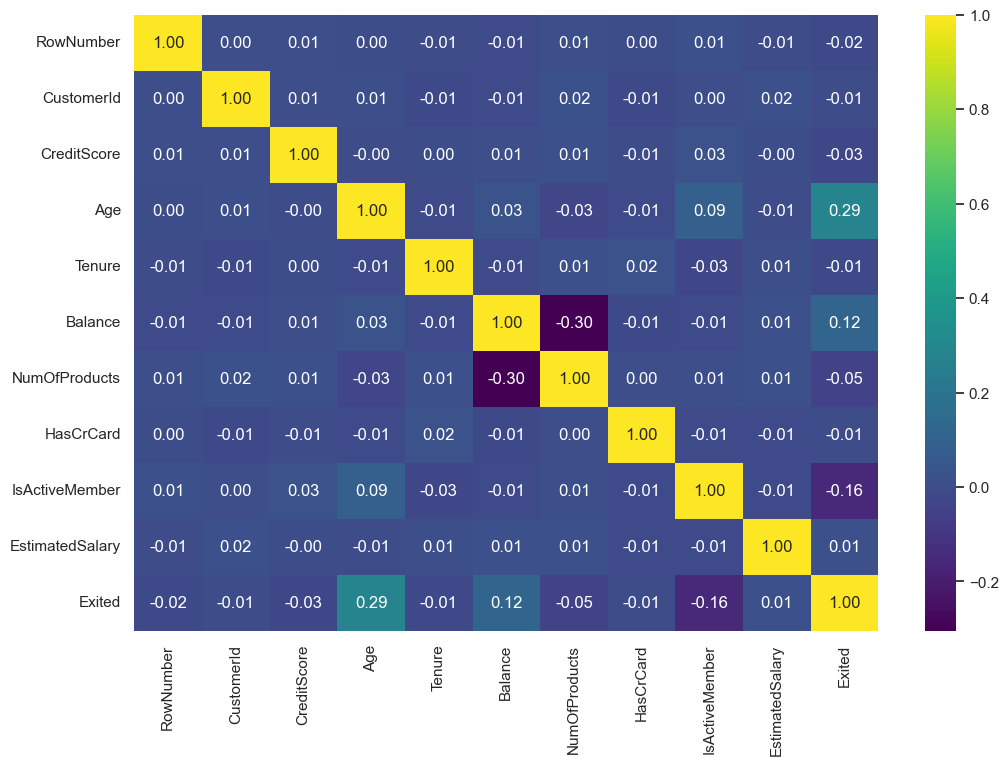

In [638]:
# Mapa de calor com paleta de cores amigável para daltônicos
plt.figure(figsize=(12, 8))
sns.heatmap(data_corr, annot=True, cmap='viridis', fmt='.2f')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

### Variáveis Categóricas

Vamos dar uma olhada nas distribuições das variáveis categóricas, pelo menos nas principais. O objetivo é verificar o desbalanceamento destas.

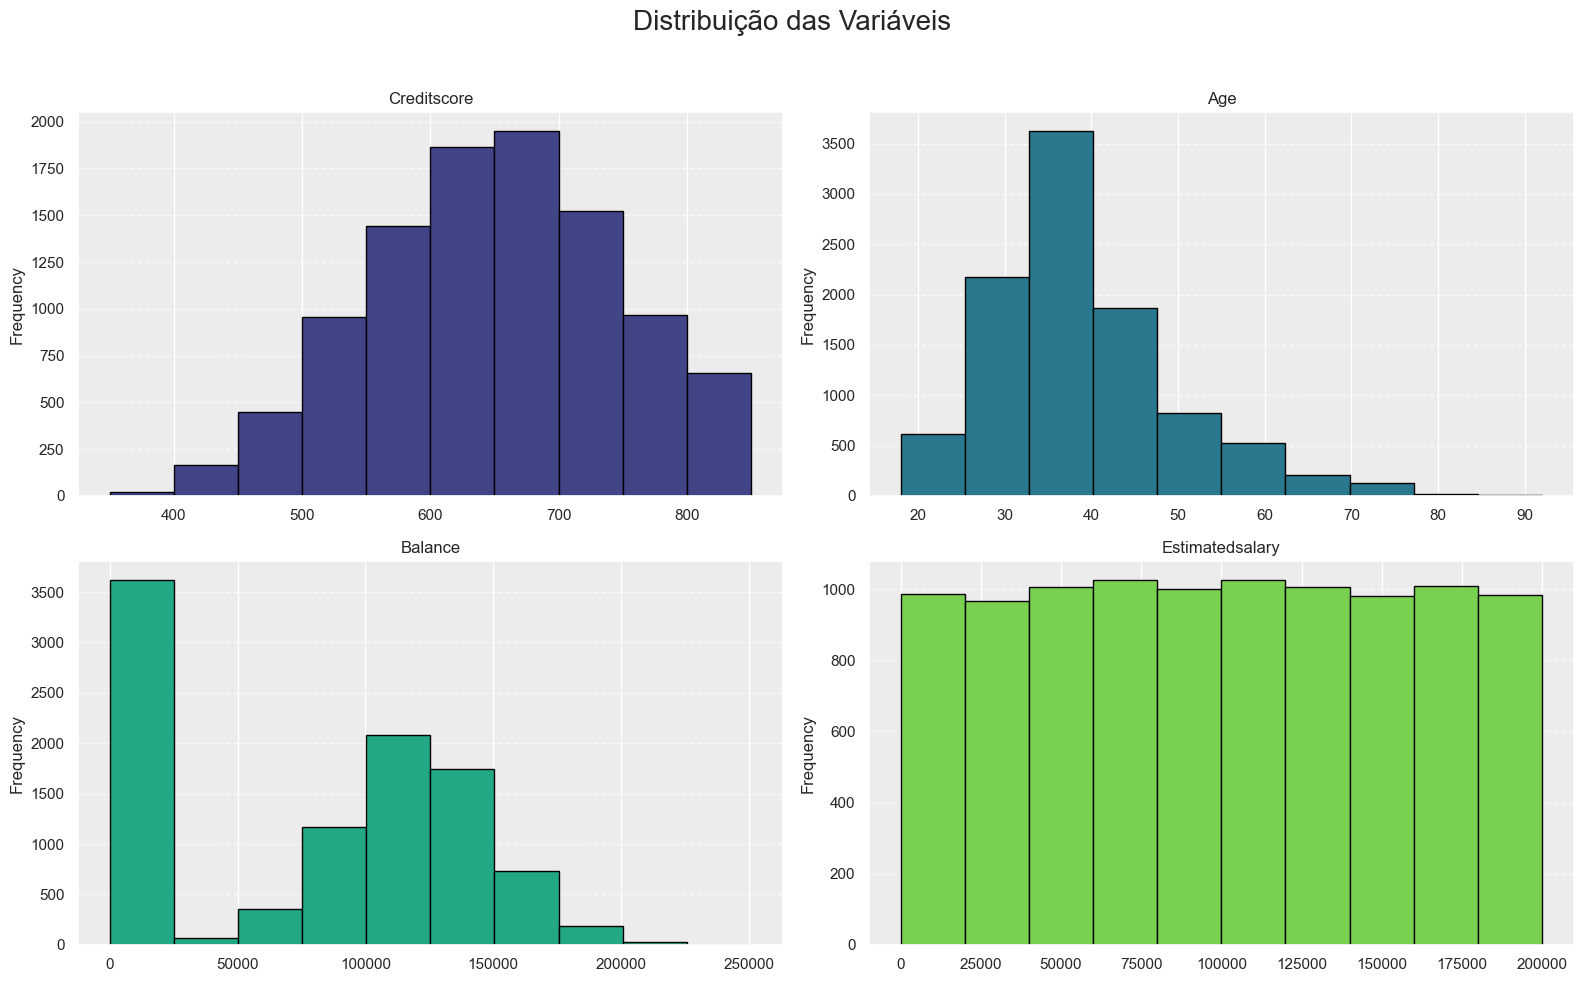

In [639]:
# Lista de variáveis contínuas
continuous_vars = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Filtra apenas as colunas numéricas
numeric_data = data[continuous_vars]

# Configurações do gráfico de histogramas com paleta de cores amigável para daltônicos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
fig.suptitle('Distribuição das Variáveis', fontsize=20)

# Paleta de cores "viridis" para os histogramas
colors = sns.color_palette('viridis', len(continuous_vars))

# Loop para criar os histogramas
for i, (var, color) in enumerate(zip(continuous_vars, colors)):
    ax = axes.flatten()[i]
    numeric_data[var].plot(kind='hist', ax=ax, color=color, edgecolor='black')
    ax.set_title(var.capitalize())
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o layout para incluir o título
plt.show()

Aqui desejamos verificar como as variáveis categóricas se comportam em relação à variável Exited (saiu ou não do banco)

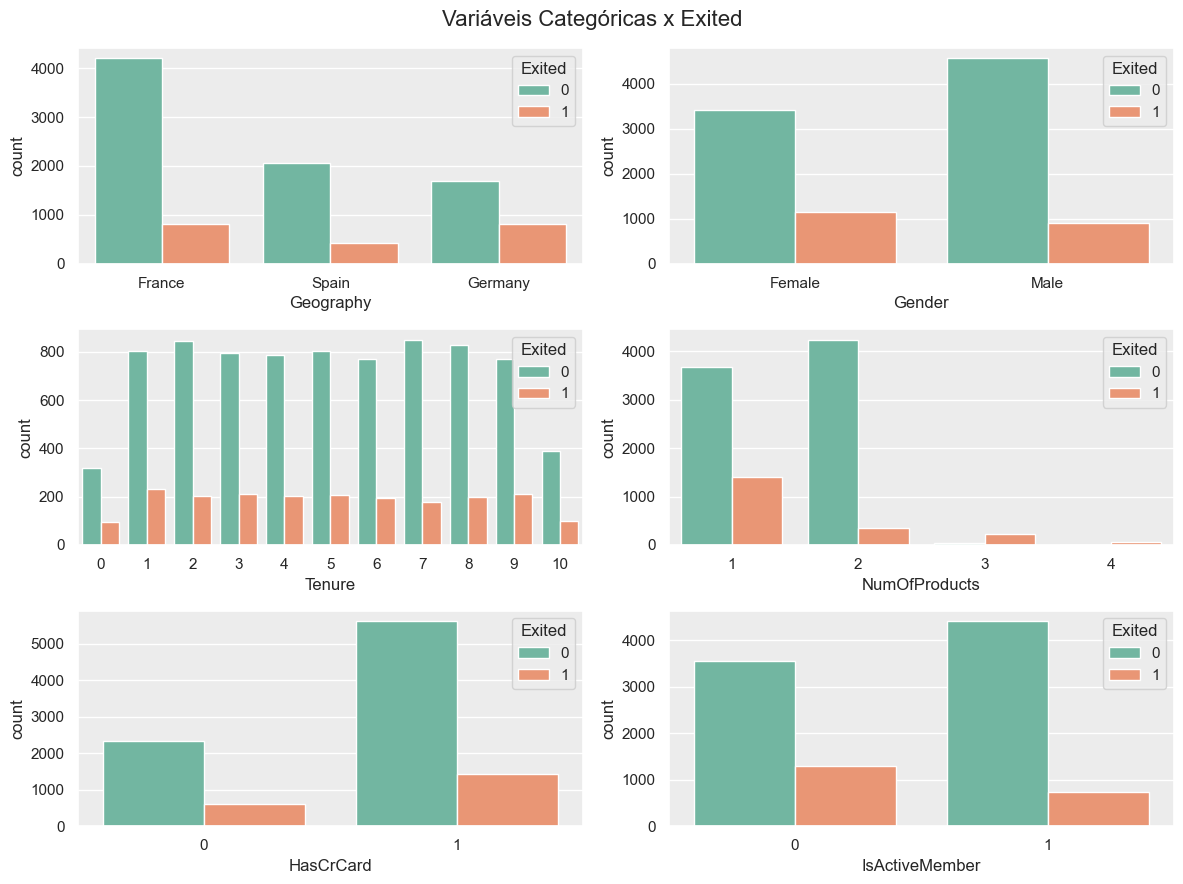

In [640]:
# Contagem das variáveis categóricas por Exited com paleta de cores amigável para daltônicos
fig, ax = plt.subplots(3, 2, figsize=(12, 9))

# Escolhendo uma paleta de cores amigável
palette = "Set2"

# Configuração do plot
sns.countplot(x='Geography', hue='Exited', data=data, ax=ax[0][0], palette=palette)
sns.countplot(x='Gender', hue='Exited', data=data, ax=ax[0][1], palette=palette)
sns.countplot(x='Tenure', hue='Exited', data=data, ax=ax[1][0], palette=palette)
sns.countplot(x='NumOfProducts', hue='Exited', data=data, ax=ax[1][1], palette=palette)
sns.countplot(x='HasCrCard', hue='Exited', data=data, ax=ax[2][0], palette=palette)
sns.countplot(x='IsActiveMember', hue='Exited', data=data, ax=ax[2][1], palette=palette)
plt.suptitle('Variáveis Categóricas x Exited', fontsize=16)
plt.tight_layout()
plt.show()

INSIGHTS:

1. A maior parte da amostra são da França, mas a nacionalidade das pessoas que mais abandonaram é alemã
2. Ainda sobre as pessoas que abandonaram, proporcionalmente é muito mais significativo pois a quantidade de pessoas da Alemanha é menos da metade das pessoas da França, faz-se necessária uma investigação.
3. Em questão de gênero, existe uma leve vantagem no número de pessoas do sexo masculino, sendo que mais pessoas do sexo feminino abandonaram, sendo que mais pessoas do sexo masculina permaneceram, uma investigação sobre as campanhas e seus conteúdos se faz necessária para entender os motivos.
4. Sobre os anos de permanência na agência, vemos um uma alta rotatividade entre 1 e 9 anos de permanecência. Uma menor taxa de encontra em menos de 1 ano, por provavelmente as pessoas estarem se adaptando mas que ainda sim se mostra relevante e em 10 anos, que a taxa de permanência despenca (tendo inúmeras causas, como idade, investimentos, etc). 
5. Já sobre o número de produtos pelos usuários, nota-se que quando menos produtos, maior a taxa de pessoas que deixam a instituição e quanto menor o número de produtos, menos pessoas permanecem. Mas o interessante é que segundo os dados, pessoas com 3 produtos ou mais, acabam por abandonar a instituição. Pode ser reflexo de uma má negociação ou até mesmo algum problema ocorrido.
6. Uma maioria de pessoas com cartões de crédito são as que mais abandonaram. Apesar de proporcionalmente, tais pessoas pemanecerem mais, ainda sim é necessária uma análise aprofundada sobre a taxa de de abandono.
7. Como era de se esperar, pessoas inativas terão maior taxa de abandono.

### Variável Geography

In [641]:
# Contagem simples dos valores únicos de Geography
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

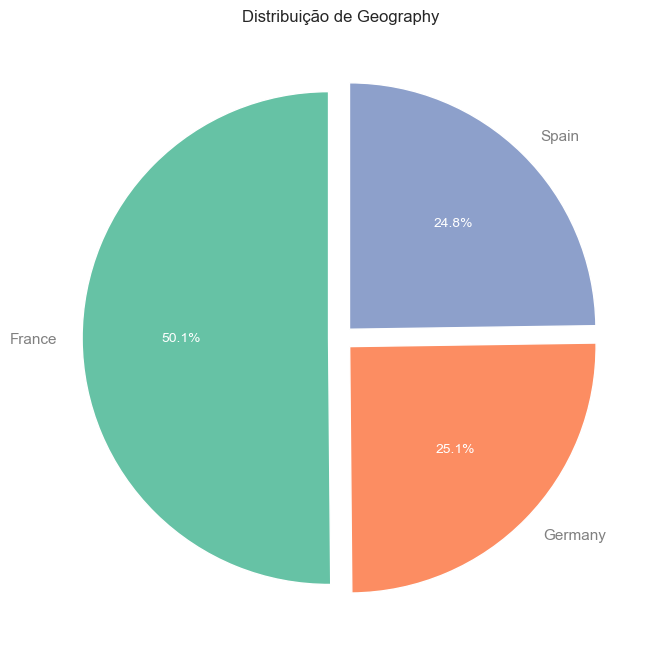

In [642]:
# Dados para 'Geography'
geography_values = data['Geography'].value_counts().values
geography_labels = data['Geography'].value_counts().index

# Configurações do gráfico de pizza com paleta de cores amigável para daltônicos
fig, ax = plt.subplots(figsize=(8, 8))
explode = (0.05, 0.05, 0.05) 

# Cria o gráfico de pizza com paleta de cores amigável
patches, texts, autotexts = ax.pie(geography_values, 
                                   labels=geography_labels, autopct='%1.1f%%', 
                                   startangle=90, explode=explode, colors=sns.color_palette('Set2'))

# Configurações adicionais para melhorar a legibilidade
plt.setp(texts, color='grey')
plt.setp(autotexts, size=10, color='white')
plt.title('Distribuição de Geography')

# Exibe o gráfico
plt.show()

Como vimos anterirmente, mais de 50% das pessoas são francesas e os 50% são divididos quase que igualmente entre alemães e espanhóis. O que mostra também que a proporção de alemães que deixam a instituição é relevante, dado o seu tamanho em comparação aos franceses.

### Variável Gender

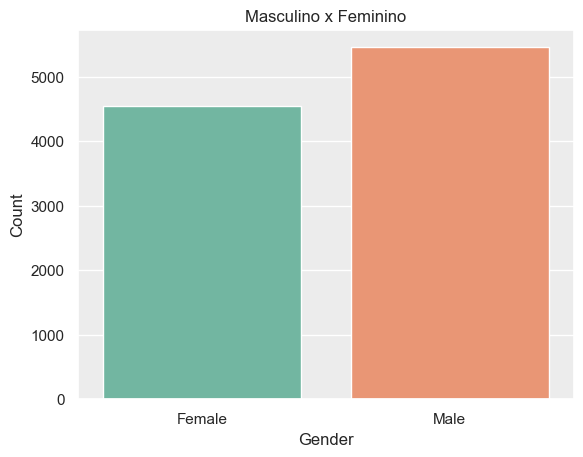

In [643]:
# Contagem de valores únicos na coluna 'Gender'
exit_counts = data['Gender'].value_counts()

# Paleta de cores amigável para daltônicos
colors = sns.color_palette('Set2')

# Cria um gráfico de barras com paleta de cores amigável
sns.countplot(x='Gender', data=data, palette=colors)

# Adiciona rótulos e título ao gráfico
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Masculino x Feminino')

# Exibe o gráfico
plt.show()

In [644]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

Apesar de um equilíbrio entre os gêneros, não descartamos a necessidade de um balanceamento de classe para os modelos preditivos.

### Variáveis Numéricas

Agora é hora de entendermos os comportamentos das variáveis numéricas estatisticamente.

In [645]:
# Estatisticas descritivas
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


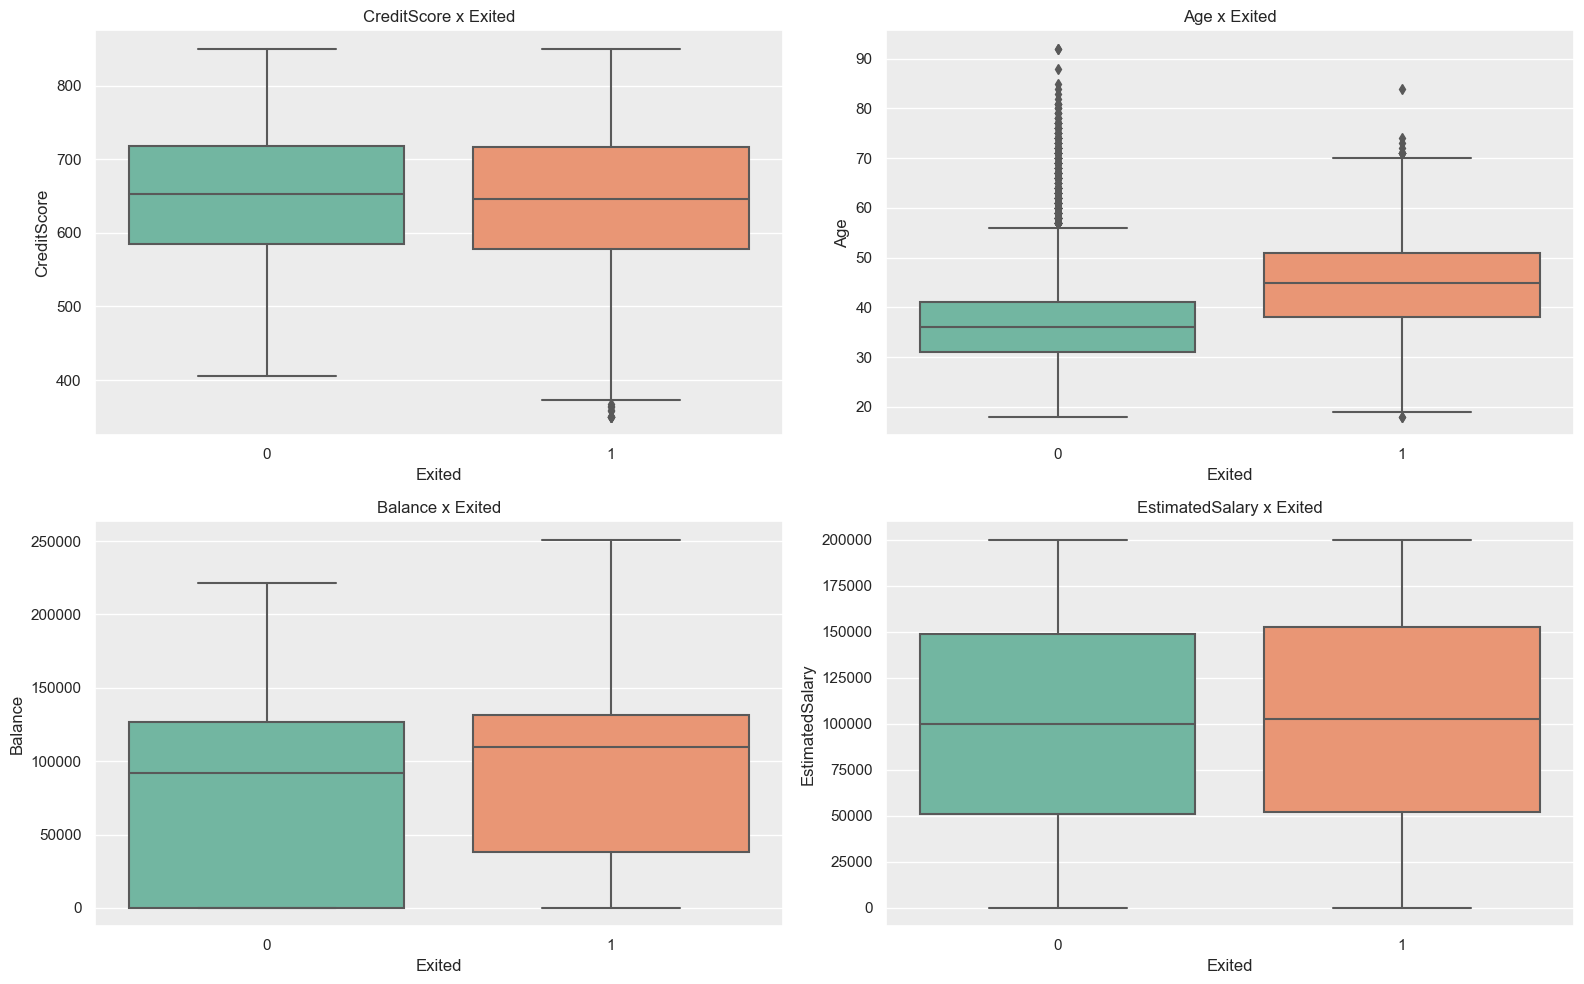

In [646]:
# Visualizando variáveis contínuas com paleta de cores amigável para daltônicos
fig, ax = plt.subplots(2, 2, figsize=(16, 10))

# Lista de variáveis contínuas
continuous_vars = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Paleta de cores amigável para daltônicos
colors = sns.color_palette('Set2')

# Loop para criar os gráficos
for i, var in enumerate(continuous_vars):
    sns.boxplot(x='Exited', y=var, data=data, ax=ax[i // 2, i % 2], palette=colors)
    ax[i // 2, i % 2].set_title(f'{var} x Exited')

plt.tight_layout()
plt.show()

INSIGHTS:

1. Estatisticamente a relação do score de crédito e abandono, não é se diferencia tanto. Tanto média, mediana, e os quartis são basicamente parecidos, com alguma presença de outliers no grupo de pessoas que abandonaram.
2. Em relação à idade com a decisão de deixar ou não, nota-se muitos outliers no número de pessoas que permanecem. Fora isso, vemos que as pessoas com idades entre ~38 e ~52 anos são as que mais deixaram o banco, enquanto as pessoas mais jovens (entre ~31 e ~41 anos) foram as que mais permaneceram.
3. Em relação ao saldo, a principal preocupação. Pessoas com maior volume em suas contas têm deixado o banco, sendo a mediana acima de 100000.
4. Com base no nível salarial, estatisticamente são bem parecidos, mas o volume que churn é preocupante, pois são pessoas com ganhos entre ~50k e ~150k.

Através da Matrix de Confusão notamos que não temos multicolinearidade, tendo uma correlação positiva média somente Exited e Age e negativa média entre Balance x NumOfProducts

### Variável CreditScore

A variável CredictScore é referente à pontuação, um tipo de ranking do cliente dentro das instituições, é de grande importância o seu estudo, pois pontuações baixas podem ser resultado de baixa renda, baixa atividade bancária, poucos produtos bancários, etc.

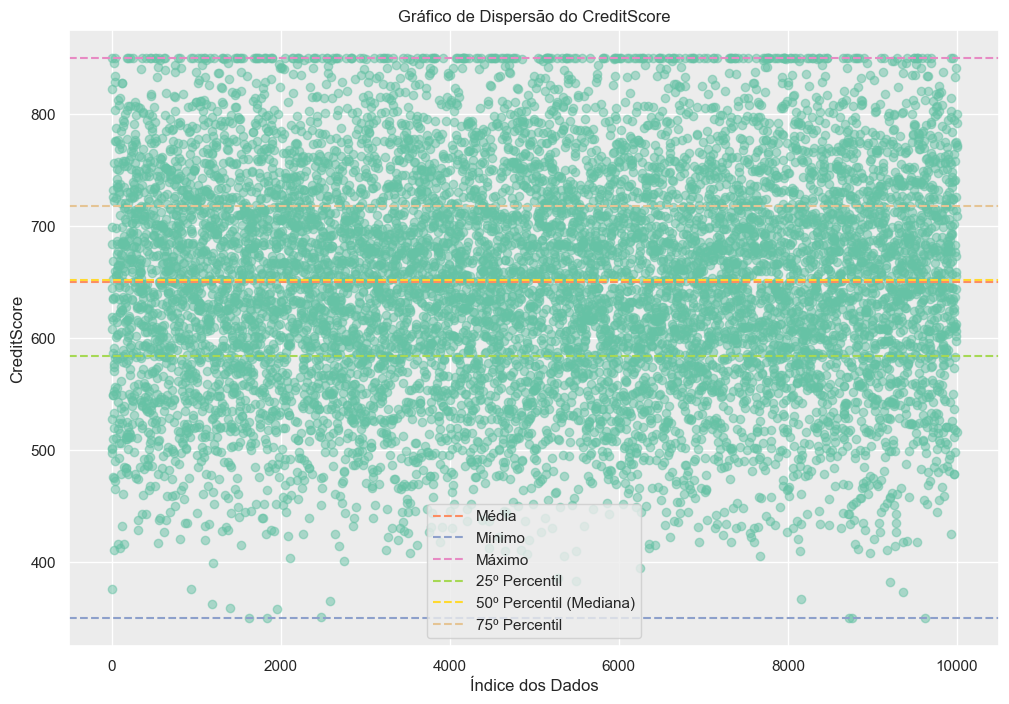

In [647]:
# Dados
credit_scores = data['CreditScore']

# Estatísticas descritivas
mean_score = credit_scores.mean()
min_score = credit_scores.min()
max_score = credit_scores.max()
q25 = credit_scores.quantile(0.25)
q50 = credit_scores.quantile(0.50)
q75 = credit_scores.quantile(0.75)

# Paleta de cores amigável para daltônicos
colors = sns.color_palette('Set2')

# Gráfico de dispersão com paleta de cores amigável
plt.figure(figsize=(12, 8))
plt.scatter(range(len(credit_scores)), credit_scores, alpha=0.5, c=colors[0])

# Linhas para indicar as estatísticas descritivas com cores amigáveis
plt.axhline(y=mean_score, color=colors[1], linestyle='--', label='Média')
plt.axhline(y=min_score, color=colors[2], linestyle='--', label='Mínimo')
plt.axhline(y=max_score, color=colors[3], linestyle='--', label='Máximo')
plt.axhline(y=q25, color=colors[4], linestyle='--', label='25º Percentil')
plt.axhline(y=q50, color=colors[5], linestyle='--', label='50º Percentil (Mediana)')
plt.axhline(y=q75, color=colors[6], linestyle='--', label='75º Percentil')

# Adiciona rótulos e título
plt.xlabel('Índice dos Dados')
plt.ylabel('CreditScore')
plt.title('Gráfico de Dispersão do CreditScore')

# Adiciona legenda
plt.legend()

# Exibe o gráfico
plt.show()

Apesar de um gráfico um pouco confuso para quem se depara pela primeira vez, nesse gráfico de dispersão é possível ver a maior concentração dos registros, quase como se fosse um boxplot, com as linhas tracejadas. Mas para quem ainda possa haver dúvidas, o boxplot abaixo confirma exatamente as informações.

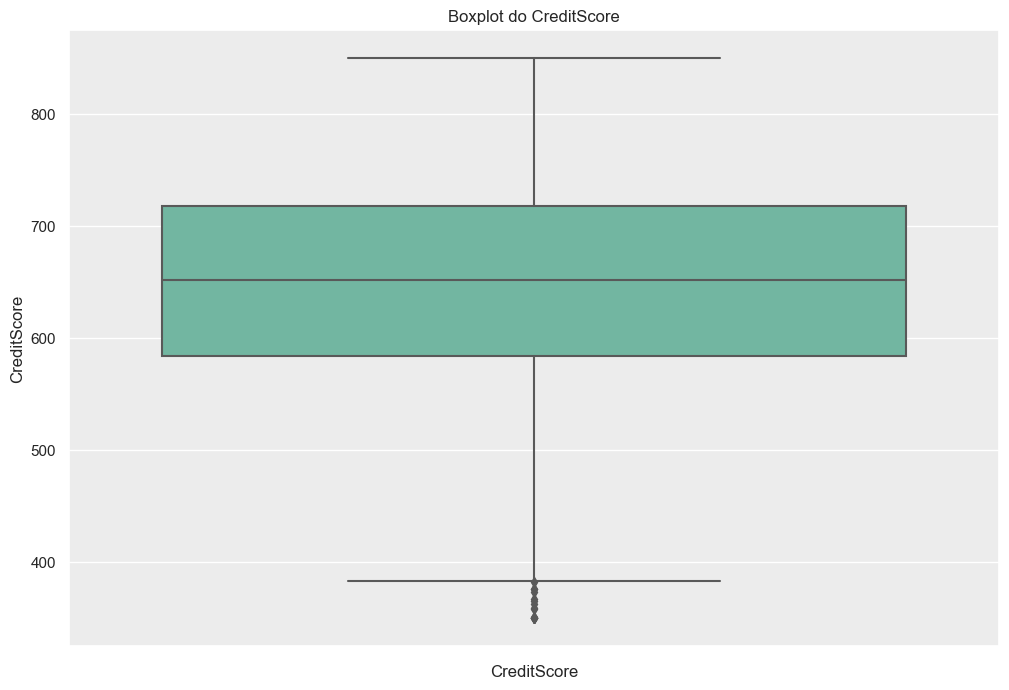

In [648]:
# Dados
plt.figure(figsize=(12, 8))
credit_scores = data['CreditScore']

# Paleta de cores amigável para daltônicos
colors = sns.color_palette('Set2')

# Cria um boxplot com orientação horizontal e cores amigáveis
sns.boxplot(y=credit_scores, orient='h', color=colors[0])

# Adiciona rótulo e título
plt.xlabel('CreditScore')
plt.title('Boxplot do CreditScore')

# Exibe o gráfico
plt.show()

In [649]:
data['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

Para confirmar as informações do gráfico de dispersão, nesse boxplot podemo ver:
- maioria dos dados entre ~590 e ~720
- média ~650 razoavelmente próxima à mediana ~652
- presença de outliers abaixo de 350

### Variável Balance

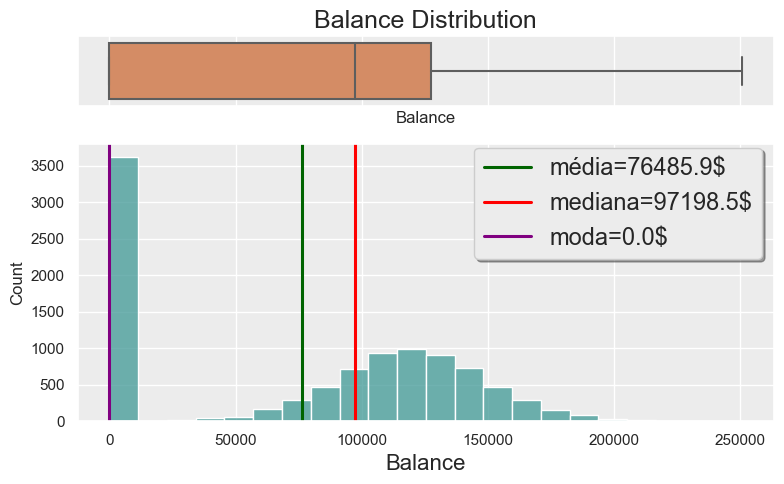

In [650]:
num_plot(data, 'Balance', 'Balance Distribution' , '$' )

Notamos um grande volume de dados zerados, ou seja, são dados sem informação e que estão afetando a distribuição e as estatísticas, pois a média e a mediana estão razoavelmente distantes. Faremos a sua exclusão.

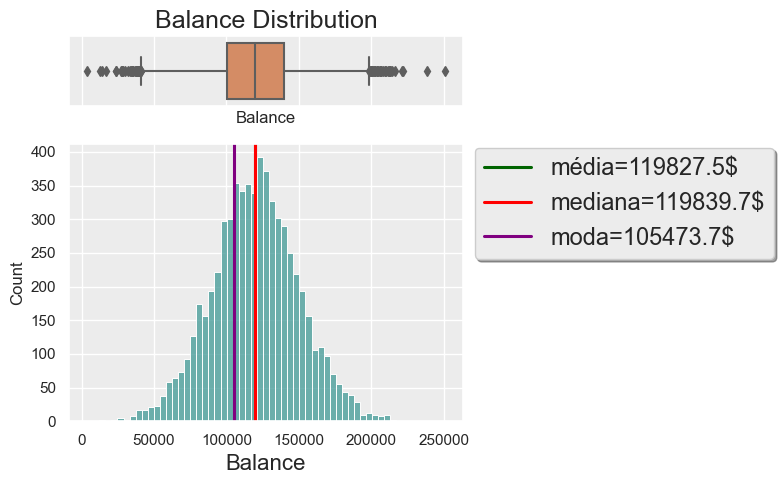

In [651]:
# Filtra os valores iguais a 0 na coluna 'Balance'
filtered_data = data[data['Balance'] != 0]

# Chama a função num_plot com os dados filtrados
num_plot(filtered_data, 'Balance', 'Balance Distribution' , '$' )

Após a exclusão dos valores, a média e a mediana ficaram mais próximas, bem como a distibuição

Aqui percebemos que a existência de mais de 3600 registros zerados, o que é prejudicial para a nossa análise. Faremos a exclusão desses para verificar a distribuição.

### Variável Age

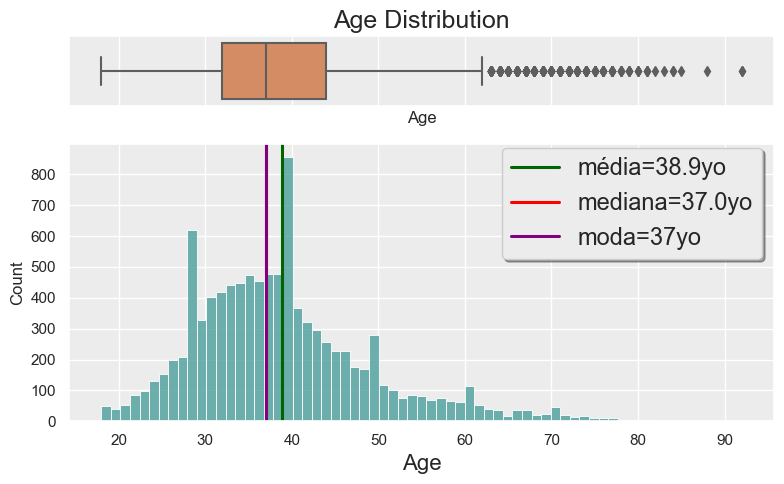

In [652]:
num_plot(data, 'Age', 'Age Distribution' , 'yo' )

Parece que esta distribuição pode ser potencialmente normalizada usando a transformação logarítmica, o que vai melhorar a situalização por parte de todos.

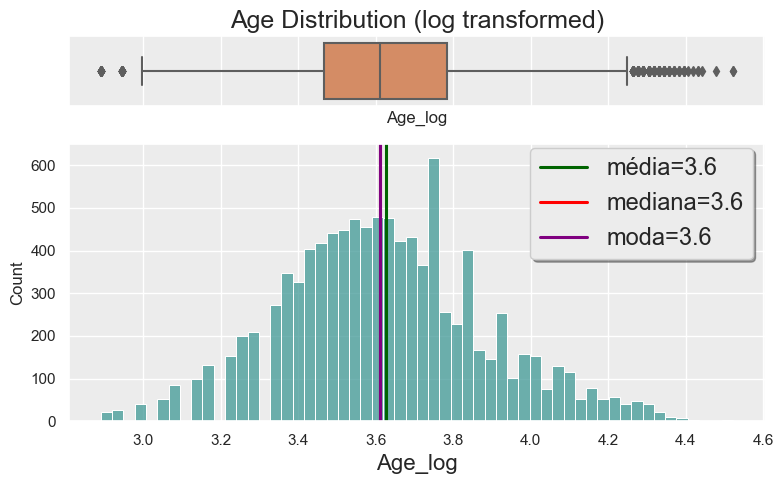

In [653]:
data['Age_log'] = np.log(data['Age'])
num_plot(data, 'Age_log', 'Age Distribution (log transformed)' , '')

Dito e feito! Ao realizarmos a transformação logarítmica, a distribuição parece normal, com moda = mediana = média.

### Variável Exited

A variável mais importante, o famoso target o qual fundamenta a nossa análise e que exije um cuidado especial para evitar certo viés em nossos modelos preditivos. Caso haja desbalanceamento, faremos o devido tratamento.

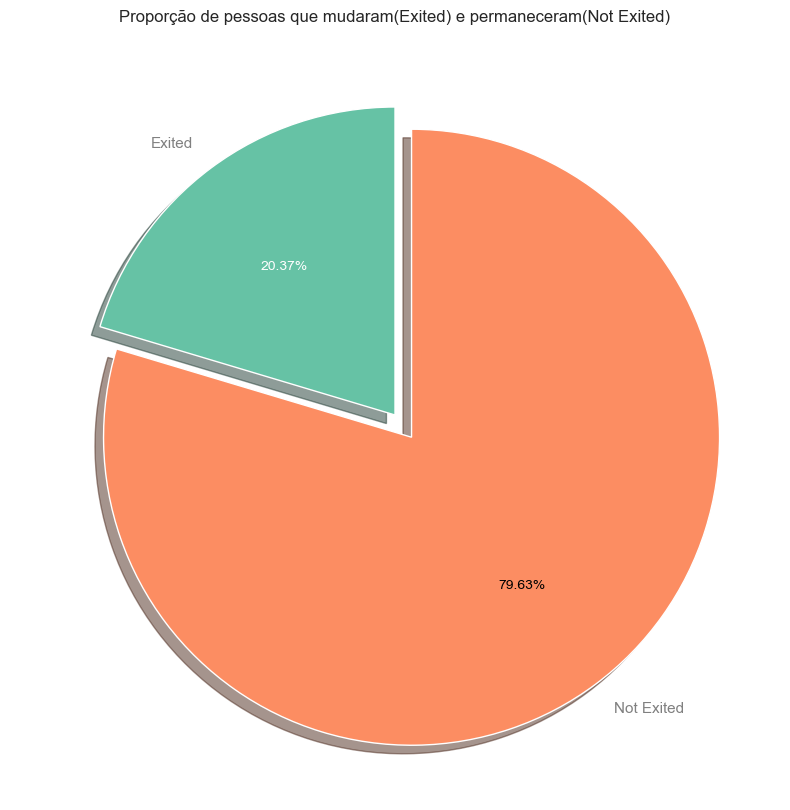

In [654]:
# Dados do seu DataFrame (exemplo usando as colunas 'Exited' e 'NotExited')
values = [data['Exited'].sum(), (1 - data['Exited']).sum()]
labels = ['Exited', 'Not Exited']

# Paleta de cores amigável para daltônicos
colors = sns.color_palette('Set2')

# Configurações do gráfico de pizza
fig, ax = plt.subplots(figsize=(10, 10))
explode = (0, 0.09)

# Cria o gráfico de pizza com cores amigáveis
patches, texts, autotexts = ax.pie(values, 
                                   labels=labels, autopct='%1.2f%%', shadow=True,
                                   startangle=90, explode=explode, colors=colors)

# Configurações adicionais para melhorar a legibilidade
plt.setp(texts, color='grey')
plt.setp(autotexts, size=10, color='white')
plt.title('Proporção de pessoas que mudaram(Exited) e permaneceram(Not Exited)')
autotexts[1].set_color('black')

# Exibe o gráfico
plt.show()

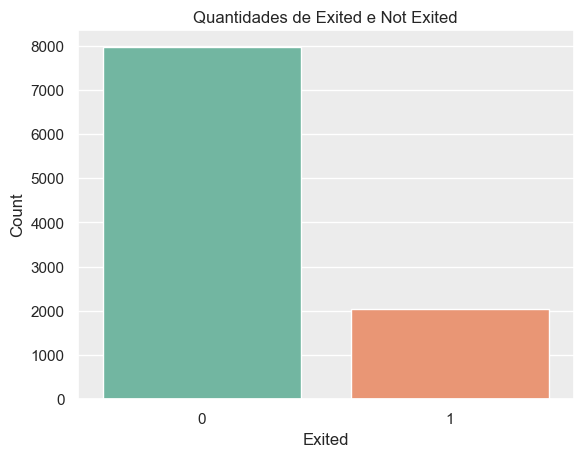

In [655]:
# Contagem de valores únicos na coluna 'Exited'
exit_counts = data['Exited'].value_counts()

# Paleta de cores amigável para daltônicos
colors = sns.color_palette('Set2')

# Cria um gráfico de barras com cores amigáveis
sns.countplot(x='Exited', data=data, palette=colors)

# Adiciona rótulos e título ao gráfico
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Quantidades de Exited e Not Exited')

# Exibe o gráfico
plt.show()

Como citado anteriormente, o conjunto de dados apresenta um desequilíbrio em relação ao target 'Exited'. Durante o treinamento do modelo preditivo, o desequilíbrio no conjunto de dados pode gerar um viés em direção à classe majoritária (0), resultando em um desempenho insatisfatório ao prever a classe minoritária (1).

Faaremos uso de uma técnica muito conhecida e eficaz chamada de SMOTE para melhorarmos a análise pelas máquinas.

### Relação Estatística: EstimatedSalary x NumOfProducts x Exited

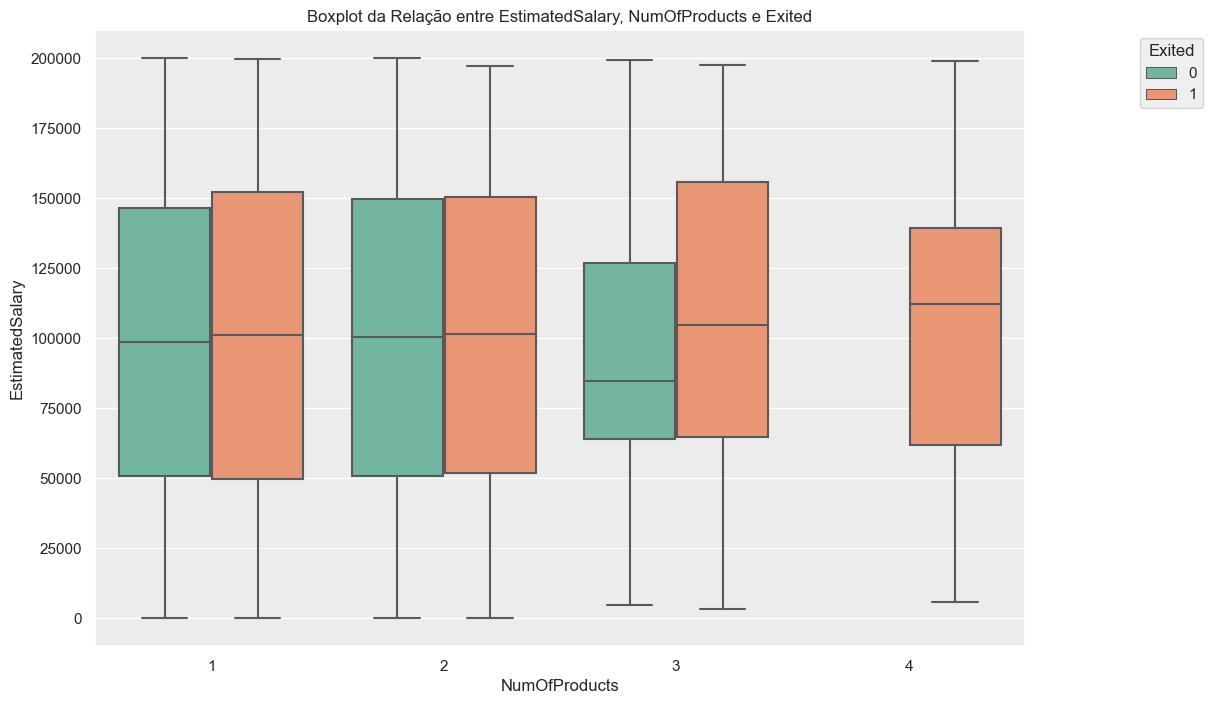

In [656]:
# Configurações do gráfico de boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, y='EstimatedSalary', x='NumOfProducts', hue='Exited', palette='Set2')

# Adiciona título e rótulos
plt.title('Boxplot da Relação entre EstimatedSalary, NumOfProducts e Exited')
plt.xlabel('NumOfProducts')
plt.ylabel('EstimatedSalary')

# Adiciona legenda
plt.legend(title='Exited', loc='upper right', bbox_to_anchor=(1.2, 1))

# Exibe o gráfico
plt.show()

Aqui consegumos comparar as medianas dos números de produtos, pelo salário estimado, levando-se em conta se o cliente saiu ou permaneceu. Nota-se que a mediana dos salários estimados são próximas, alternando de 100000 até ~105000. 

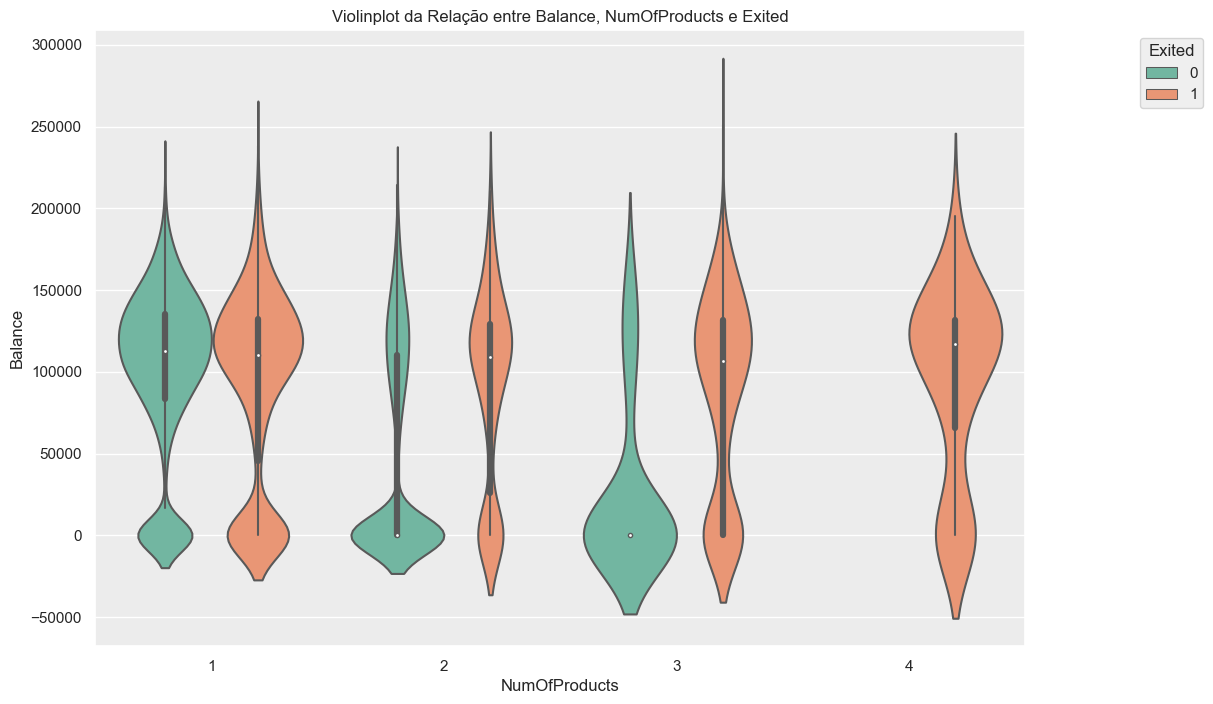

In [657]:
# Configurações do gráfico de violinplot
plt.figure(figsize=(12, 8))
sns.violinplot(data=data, y='Balance', x='NumOfProducts', hue='Exited', palette='Set2')

# Título e rótulos
plt.title('Violinplot da Relação entre Balance, NumOfProducts e Exited')
plt.xlabel('NumOfProducts')
plt.ylabel('Balance')

# Legenda
plt.legend(title='Exited', loc='upper right', bbox_to_anchor=(1.2, 1))

# Exibe o gráfico
plt.show()

### Balanço total por país

In [658]:
balance_france = data.Balance[data.Geography == 'France'].sum()
balance_germany = data.Balance[data.Geography == 'Germany'].sum()
balance_spain = data.Balance[data.Geography == 'Spain'].sum()

print("Balanço Total - France :",balance_france)
print("Balanço Total - Germany :",balance_germany)
print("Balanço Total - Spain :",balance_spain)

Balanço Total - France : 311332479.49
Balanço Total - Germany : 300402861.38
Balanço Total - Spain : 153123552.01


In [659]:
data['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

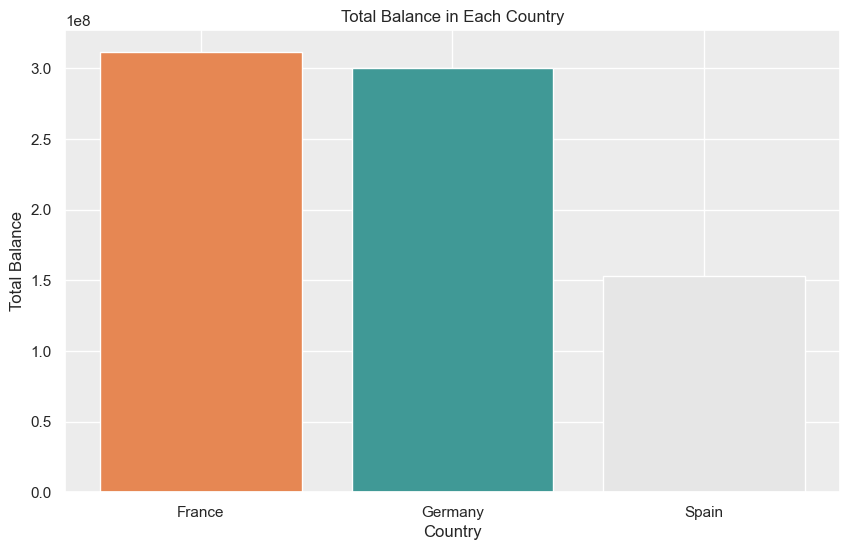

In [660]:
import matplotlib.pyplot as plt

# Calculando os totais
total_balances = [balance_france, balance_germany, balance_spain]
countries = ['France', 'Germany', 'Spain']

# Criando um gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(countries, total_balances, color=['#E68753', '#409996', '#E6E6E6'])
plt.xlabel('Country')
plt.ylabel('Total Balance')
plt.title('Total Balance in Each Country')
plt.show()

### HasCrCard x Geography

<Figure size 800x800 with 0 Axes>

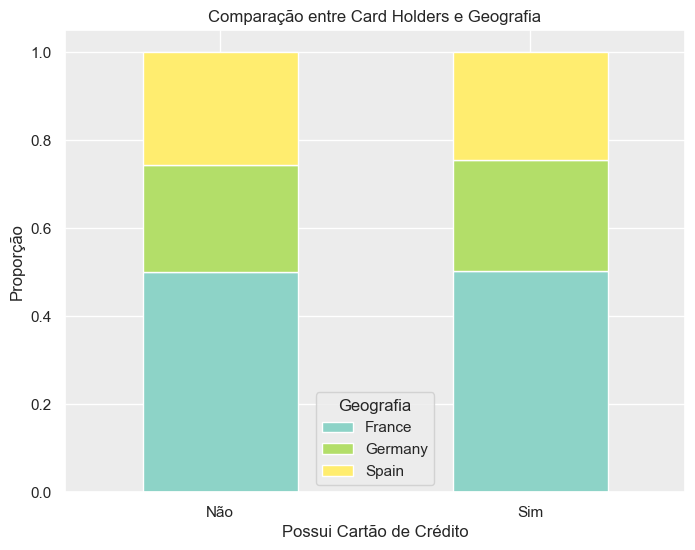

In [661]:
# Tabela de contingência entre HasCrCard e Geography
HasCrCard = pd.crosstab(data['HasCrCard'], data['Geography'])

# Normaliza os valores para gerar proporções
HasCrCard_normalized = HasCrCard.div(HasCrCard.sum(1).astype(float), axis=0)

# Configurações do gráfico de barras empilhadas
plt.figure(figsize=(8, 8))
HasCrCard_normalized.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set3')

# Adiciona título e rótulos
plt.title('Comparação entre Card Holders e Geografia')
plt.xlabel('Possui Cartão de Crédito')
plt.ylabel('Proporção')
plt.xticks([0, 1], ['Não', 'Sim'], rotation=0)

# Adiciona legenda
plt.legend(title='Geografia')

# Exibe o gráfico
plt.show()

### IsActiveMember x Geography

<Figure size 800x800 with 0 Axes>

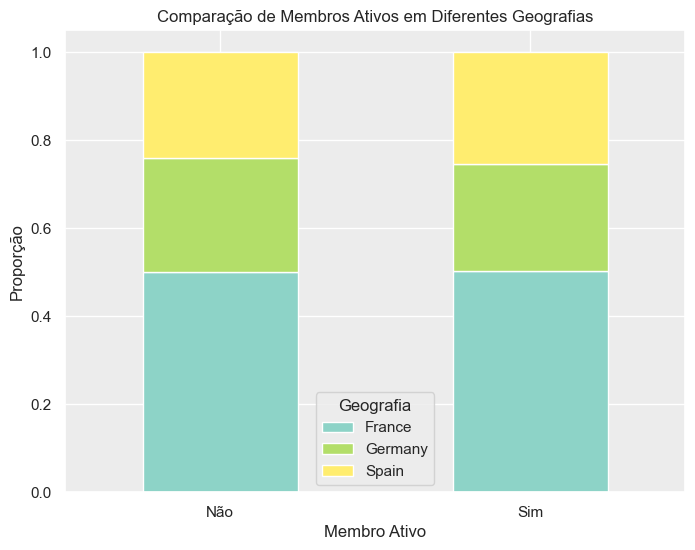

In [662]:
# Tabela de contingência entre IsActiveMember e Geography
IsActiveMember = pd.crosstab(data['IsActiveMember'], data['Geography'])

# Normaliza os valores para gerar proporções
IsActiveMember_normalized = IsActiveMember.div(IsActiveMember.sum(1).astype(float), axis=0)

# Configurações do gráfico de barras empilhadas
plt.figure(figsize=(8, 8))
IsActiveMember_normalized.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set3')

# Adiciona título e rótulos
plt.title('Comparação de Membros Ativos em Diferentes Geografias')
plt.xlabel('Membro Ativo')
plt.ylabel('Proporção')
plt.xticks([0, 1], ['Não', 'Sim'], rotation=0)

# Adiciona legenda
plt.legend(title='Geografia')

# Exibe o gráfico
plt.show()

Nos 2 plots acima, confirmamos a informação de que os dados possuem mais informações sobre franceses do que as 2 outras nacionalidades, tanto para cartão de crédito quanto para usuários ativos.

### Age x Geography

<Figure size 1500x1500 with 0 Axes>

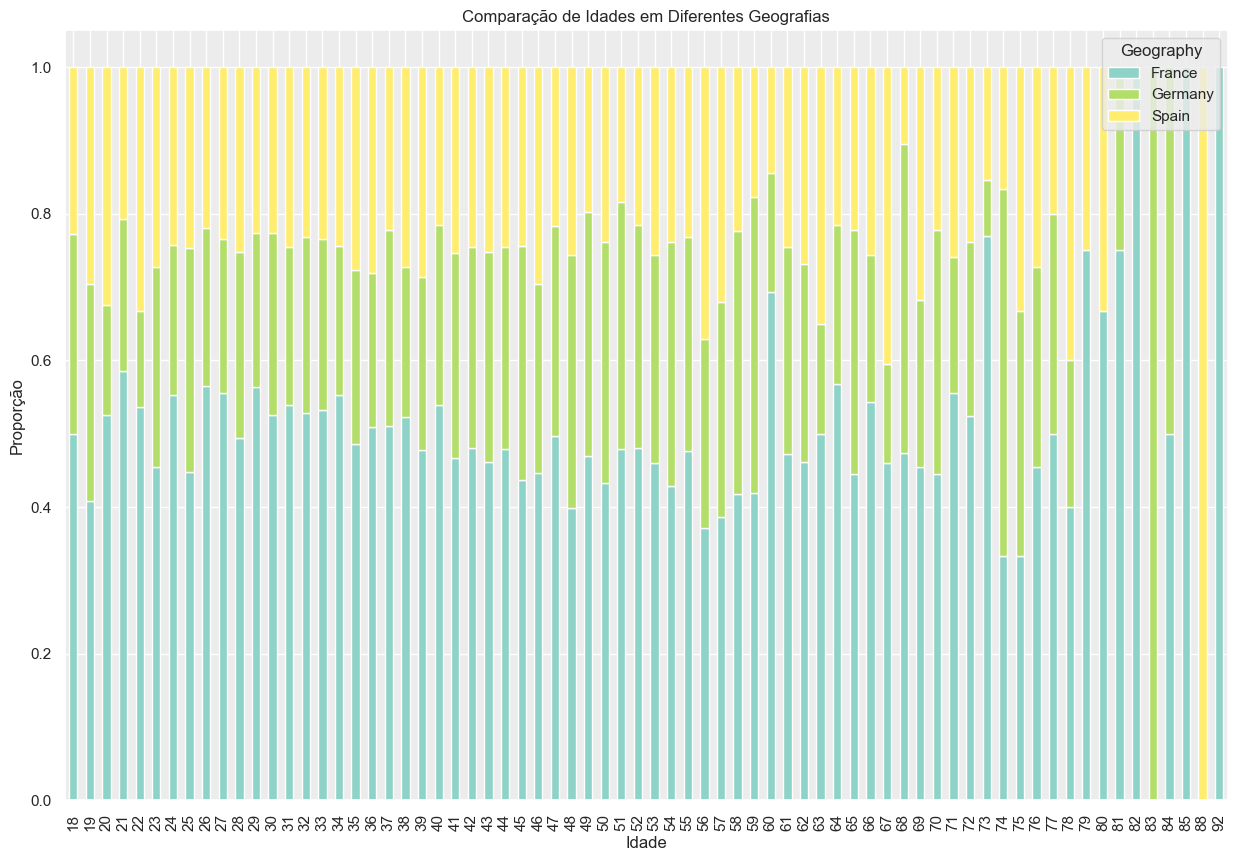

In [663]:
# Tabela de contingência entre Age e Geography
Age = pd.crosstab(data['Age'], data['Geography'])

# Normaliza os valores para gerar proporções
Age_normalized = Age.div(Age.sum(1).astype(float), axis=0)

# Configurações do gráfico de barras empilhadas
plt.figure(figsize=(15, 15))
Age_normalized.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='Set3')

# Adiciona título e rótulos
plt.title('Comparação de Idades em Diferentes Geografias')
plt.xlabel('Idade')
plt.ylabel('Proporção')

# Exibe o gráfico
plt.show()

Aqui conseguimos visualizar a distribuição das idades por país, veja que são raros os casos em que as idades em que não temos a predominância de franceses.

## 02. Pré-Processamento

### Excluindo colunas que não serão usadas

Sim, poderíamos ter feito isso antes mesmo das primeiras plotagens, mas preferi trazer até a etapa final pois insights podem vir a qualquer momento.

In [664]:
data = data.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_log
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,3.737670
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3.713572
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3.737670
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,3.663562
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,3.761200
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,3.663562
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,3.555348
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,3.583519
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,3.737670


### Convertendo dados categóricos para numéricos

Primeiramente, vamos converter atributos categóricos em numéricos usando a função OneHotEncoder (ou .get_dummies ()) para viabilizar a utilização desses atributos como entrada para modelos de aprendizado de máquina. 

A escolha pelo OneHotEncoder, em detrimento do LabelEncoder, se deve à natureza dos atributos em questão. No caso de Geografia e Gênero, que possuem apenas algumas categorias (Espanha, França, Alemanha; Masculino, Feminino), e considerando que a ordem dessas categorias não é relevante, o uso da função OneHotEncoder é mais apropriado. 

Caso houvesse um grande número de categorias em cada atributo e optássemos pelo OneHotEncoder, precisaríamos lidar com o desafio da maldição da dimensionalidade de maneira adequada.

In [665]:
# Codificando one-hot para as colunas 'Geography' e 'Gender'
data = pd.get_dummies(data=data, columns=['Geography', 'Gender'])

# Exibindo as primeiras cinco linhas do DataFrame resultante
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_log,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,3.737670,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,3.713572,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,3.737670,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,3.663562,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,3.761200,False,False,True,True,False


### Ajustando (balanceando) os dados para os modelos

Agora podemos avançar para lidar com a variável de destino desbalanceada. 

Vamos utilizar a estratégia de oversampling por meio da classe RandomOverSampler. Com isso, iremos gerar o mesmo número de linhas para o valor 1 da variável de destino "Exited", garantindo, assim, que tenhamos o mesmo número de linhas para ambos os valores da variável de destino. Se não tratássemos a variável de destino desbalanceada, os modelos de aprendizado de máquina tenderiam a favorecer (seriam enviesados em direção a) a classe 0 em detrimento da classe 1.

In [666]:
# Biblioteca que trata dados desbalanceados através da técnica de oversampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Selecionando as colunas relevantes
columns = ['CreditScore', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary', 'Exited']
columns = [c for c in columns if c not in ['Exited']]  # Removendo a coluna 'Exited' das features

# Separando a variável alvo (y) e as features (x)
y = data['Exited']  # Variável alvo original
x = data[columns]   # Features originais

# Criando uma instância do RandomOverSampler para lidar com o desbalanceamento
ros = RandomOverSampler(sampling_strategy='minority')

# Aplicando oversampling às features e à variável alvo
x_train_balanced, y_train_balanced = ros.fit_resample(x, y)

# Exibindo informações sobre a distribuição da variável alvo antes e depois do balanceamento
print(f"Imbalanced target class:\n{Counter(y)}\n\nBalanced target class:\n{Counter(y_train_balanced)}\n")

# Calculando o número de novos pontos selecionados aleatoriamente durante o oversampling
print(x_train_balanced.shape[0] - data.shape[0], 'new random picked points')


Imbalanced target class:
Counter({0: 7963, 1: 2037})

Balanced target class:
Counter({1: 7963, 0: 7963})

5926 new random picked points


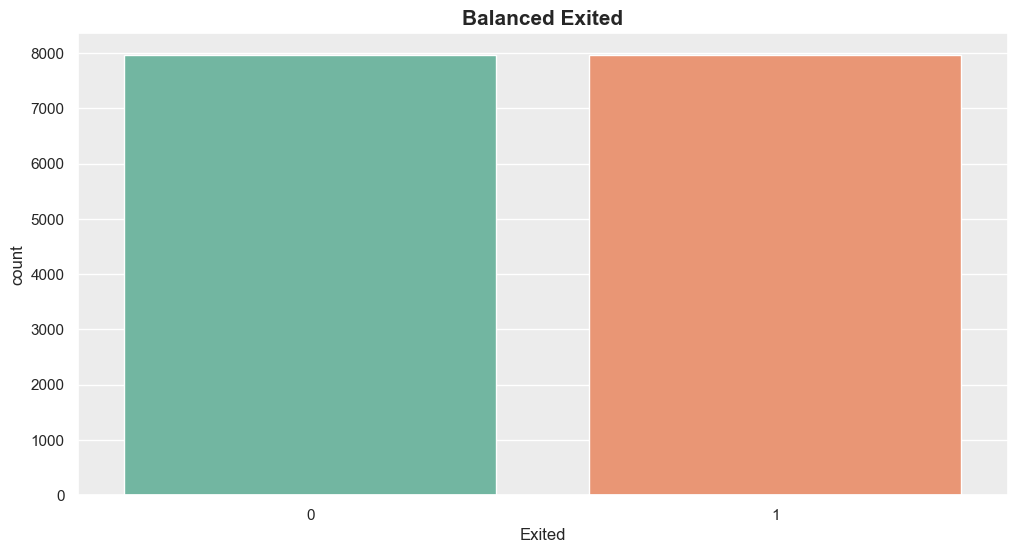

In [667]:
# Definindo a cor de fundo do gráfico
sns.set(rc={'axes.facecolor':'#ECECEC'})

# Criando uma figura com tamanho específico
plt.figure(figsize=(12,6))

# Definindo o título do gráfico
plt.title("Balanced Exited", fontsize=15, fontweight='bold', ha='center')

# Criando um gráfico de contagem (countplot) para a variável alvo balanceada
ax = sns.countplot(x=y_train_balanced, data=data, palette=palette)

# Exibindo o gráfico
plt.show()

Pronto, os dados estão balanceados para que possamos utilizá-los no treinamento dos nosso modeloos.

## 03 Modelos

É uma prática comum e até mesmo segura diversificar modelos de Machine Learning afim de obter os melhores resultados, e obviamente, utilizarei somente alguns modelos dos mais conhecidos, desde os que menos perfomaram até os de melhores performances.

In [668]:
# Separando os dados de treino e de teste
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#preparation of train and test data for ML models
x_train,x_test,y_train,y_test = train_test_split(x_train_balanced, y_train_balanced,test_size=0.3, random_state = 1) #70 % of train data, 30 % of test data
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11148, 12), (4778, 12), (11148,), (4778,))

In [669]:
# Limiar para remoção de variáveis correlacionadas
threshold = 0.9

# Matriz de correlação em valor absoluto
corr_matrix = x_train.corr().abs()
corr_matrix.head(len(columns)+2)

,CreditScore,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary
CreditScore,1.000000,0.015183,0.011406,0.005501,0.012817,0.012817,0.013954,0.017254,0.017306,0.015436,0.013232,0.023772
Geography_France,0.015183,1.000000,0.616324,0.509707,0.014186,0.014186,0.046724,0.020499,0.251586,0.013581,0.008081,0.008757
Geography_Germany,0.011406,0.616324,1.000000,0.363373,0.026288,0.026288,0.075672,0.002131,0.409987,0.024488,0.018386,0.013827
Geography_Spain,0.005501,0.509707,0.363373,1.000000,0.011938,0.011938,0.027396,0.021924,0.150278,0.010687,0.029648,0.004746
Gender_Female,0.012817,0.014186,0.026288,0.011938,1.000000,1.000000,0.041824,0.016482,0.010800,0.039004,0.000490,0.020833
Gender_Male,0.012817,0.014186,0.026288,0.011938,1.000000,1.000000,0.041824,0.016482,0.010800,0.039004,0.000490,0.020833
Age,0.013954,0.046724,0.075672,0.027396,0.041824,0.041824,1.000000,0.009866,0.057318,0.034382,0.013533,0.006566
Tenure,0.017254,0.020499,0.002131,0.021924,0.016482,0.016482,0.009866,1.000000,0.002514,0.016658,0.005857,0.017003
Balance,0.017306,0.251586,0.409987,0.150278,0.010800,0.010800,0.057318,0.002514,1.000000,0.190906,0.011701,0.000948
NumOfProducts,0.015436,0.013581,0.024488,0.010687,0.039004,0.039004,0.034382,0.016658,0.190906,1.000000,0.004199,0.025326


In [670]:
# Matriz triangular de correlações
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper.head(len(columns)+2)

,CreditScore,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary
CreditScore,NaN,0.015183,0.011406,0.005501,0.012817,0.012817,0.013954,0.017254,0.017306,0.015436,0.013232,0.023772
Geography_France,NaN,NaN,0.616324,0.509707,0.014186,0.014186,0.046724,0.020499,0.251586,0.013581,0.008081,0.008757
Geography_Germany,NaN,NaN,NaN,0.363373,0.026288,0.026288,0.075672,0.002131,0.409987,0.024488,0.018386,0.013827
Geography_Spain,NaN,NaN,NaN,NaN,0.011938,0.011938,0.027396,0.021924,0.150278,0.010687,0.029648,0.004746
Gender_Female,NaN,NaN,NaN,NaN,NaN,1.000000,0.041824,0.016482,0.010800,0.039004,0.000490,0.020833
Gender_Male,NaN,NaN,NaN,NaN,NaN,NaN,0.041824,0.016482,0.010800,0.039004,0.000490,0.020833
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009866,0.057318,0.034382,0.013533,0.006566
Tenure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002514,0.016658,0.005857,0.017003
Balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.190906,0.011701,0.000948
NumOfProducts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004199,0.025326


Criamos uma matriz triangular superior de correlações a partir da matriz de correlação original. Esse processo ajuda a identificar pares de variáveis altamente correlacionadas, sendo útil na pré-processamento, especialmente para evitar multicolinearidade ao selecionar características.

In [671]:
# Seleciona colunas com correlações acima do limiar
drop_cols = [column for column in upper.columns if any(upper[column] > threshold)]
print('Existem %d colunas para remover.' % (len(drop_cols)), 'No caso as colunas:', str(drop_cols))

Existem 1 colunas para remover. No caso as colunas: ['Gender_Male']


Aqui identificamos e listamos as colunas que têm correlações acima do limiar especificado

In [672]:
# Drop columns with correlations above threshold
x_train = x_train.drop(columns = drop_cols)
x_test = x_test.drop(columns = drop_cols)
print('Formato de X_train:', x_train.shape)
print('Formato de X_test:', x_test.shape)

Formato de X_train: (11148, 11)
Formato de X_test: (4778, 11)


Removemos as colunas identificadas como tendo correlações acima do limiar especificado, tanto do conjunto de treinamento (x_train) quanto do conjunto de teste (x_test). Isso é feito para evitar multicolinearidade e melhorar a qualidade do modelo.

### KNN (K-Nearest Neighbors)

O K-Nearest Neighbors (KNN) é um algoritmo de aprendizado supervisionado que classifica um ponto de dados com base nas classes de seus k vizinhos mais próximos no espaço de características, sendo sensível à escolha do parâmetro k.

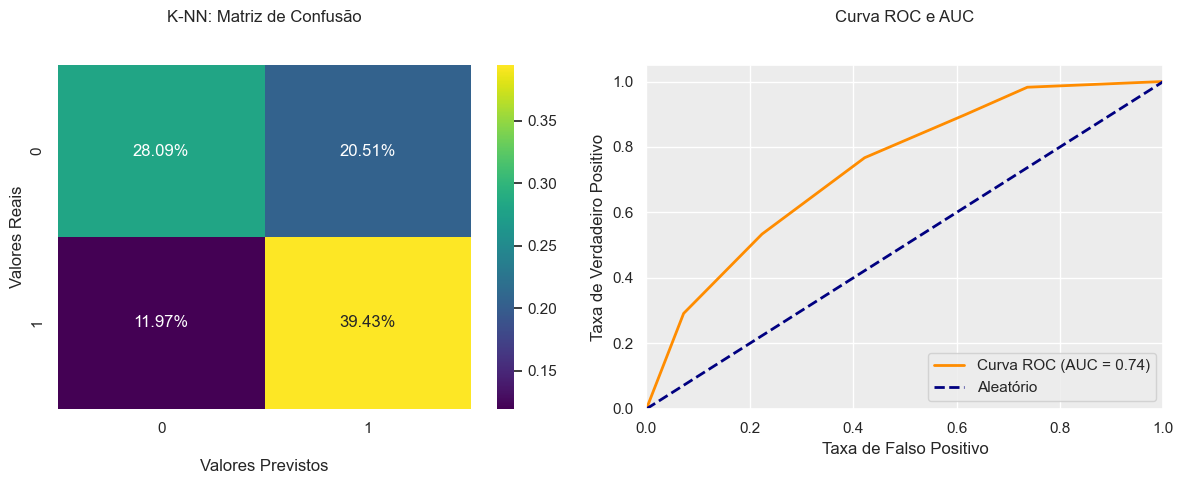

In [673]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Implementação do algoritmo K-NN
knnc = KNeighborsClassifier(n_neighbors=5)
knnc.fit(x_train, y_train)
y_pred_knnc = knnc.predict(x_test)

# Calcula a Matriz de Confusão
cf_matrix_knnc = confusion_matrix(y_test, y_pred_knnc)

# Calcula as probabilidades para a classe positiva
y_probs_knnc = knnc.predict_proba(x_test)[:, 1]

# Calcula as curvas ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_knnc)
roc_auc = auc(fpr, tpr)

# Plotando a Matriz de Confusão com paleta de cores amigável para daltônicos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotando a Matriz de Confusão
sns.heatmap(cf_matrix_knnc/np.sum(cf_matrix_knnc), annot=True, fmt='.2%', cmap='viridis', ax=axes[0])
axes[0].set_title('K-NN: Matriz de Confusão\n\n')
axes[0].set_xlabel('\nValores Previstos')
axes[0].set_ylabel('Valores Reais')
axes[0].xaxis.set_ticklabels(['0', '1'])
axes[0].yaxis.set_ticklabels(['0', '1'])

# Plotando a Curva ROC e AUC
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatório')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Taxa de Falso Positivo')
axes[1].set_ylabel('Taxa de Verdadeiro Positivo')
axes[1].set_title('Curva ROC e AUC\n\n')
axes[1].legend(loc='lower right')

# Exibindo as visualizações
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.70      0.58      0.63      2322
           1       0.66      0.77      0.71      2456

    accuracy                           0.68      4778
   macro avg       0.68      0.67      0.67      4778
weighted avg       0.68      0.68      0.67      4778

Accuracy Score : 0.675
Precision Score : 0.658
Recall Score : 0.767
F-Score : 0.708


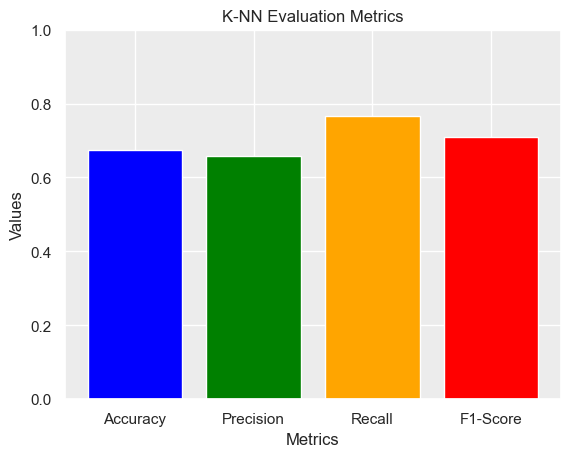

In [674]:
# Valores das métricas
accuracy = accuracy_score(y_test, y_pred_knnc)
precision = precision_score(y_test, y_pred_knnc)
recall = recall_score(y_test, y_pred_knnc)
f1 = f1_score(y_test, y_pred_knnc)

# Avaliação do K-NN: impressão das métricas
print(classification_report(y_test, y_pred_knnc))

# Imprime as métricas individualmente
print('Accuracy Score : ' + str(round(accuracy_score(y_test, y_pred_knnc), 3)))
print('Precision Score : ' + str(round(precision_score(y_test, y_pred_knnc), 3)))
print('Recall Score : ' + str(round(recall_score(y_test, y_pred_knnc), 3)))
print('F-Score : ' + str(round(f1_score(y_test, y_pred_knnc), 3)))

# Criando um gráfico de barras para as métricas
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [accuracy, precision, recall, f1]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.title('K-NN Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)  # Ajuste o limite y conforme necessário (0 a 1 para métricas de proporção)
plt.show()


### Naive Bayes

O Naive Bayes é um modelo probabilístico baseado no Teorema de Bayes, assumindo independência condicional entre as features. É eficiente, fácil de implementar e bem-sucedido em problemas com alta dimensionalidade.

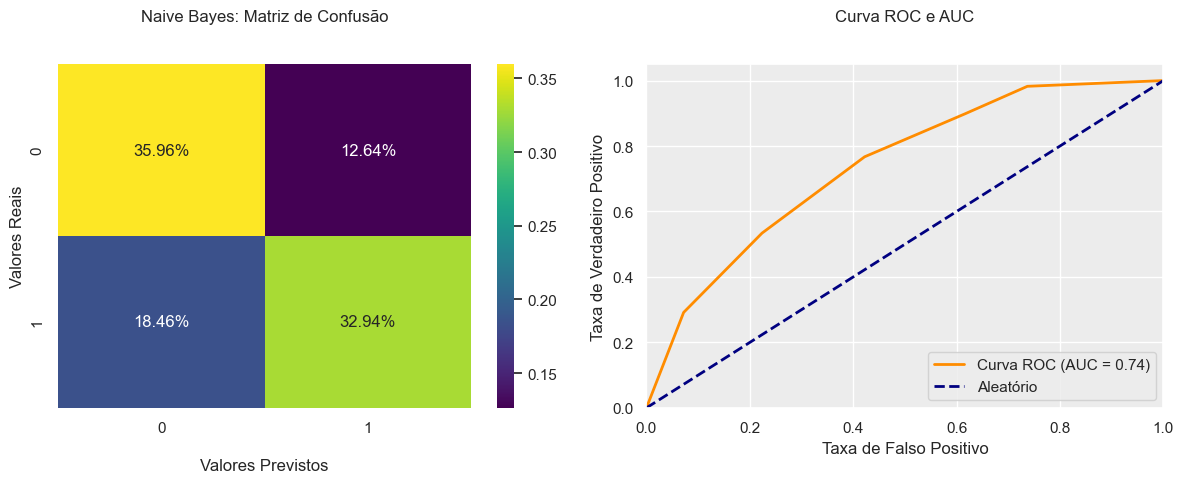

In [675]:
from sklearn.naive_bayes import GaussianNB

# Implementação do algoritmo Naive Bayes (Gaussian)
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)
y_pred_nb = nb_classifier.predict(x_test)

# Calcula a Matriz de Confusão
cf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Plotando a Matriz de Confusão com paleta de cores amigável para daltônicos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotando a Matriz de Confusão
sns.heatmap(cf_matrix_nb/np.sum(cf_matrix_nb), annot=True, fmt='.2%', cmap='viridis', ax=axes[0])
axes[0].set_title('Naive Bayes: Matriz de Confusão\n\n')
axes[0].set_xlabel('\nValores Previstos')
axes[0].set_ylabel('Valores Reais')
axes[0].xaxis.set_ticklabels(['0', '1'])
axes[0].yaxis.set_ticklabels(['0', '1'])

# Plotando a Curva ROC e AUC
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatório')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Taxa de Falso Positivo')
axes[1].set_ylabel('Taxa de Verdadeiro Positivo')
axes[1].set_title('Curva ROC e AUC\n\n')
axes[1].legend(loc='lower right')

# Exibindo as visualizações
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.66      0.74      0.70      2322
           1       0.72      0.64      0.68      2456

    accuracy                           0.69      4778
   macro avg       0.69      0.69      0.69      4778
weighted avg       0.69      0.69      0.69      4778

Accuracy Score : 0.689
Precision Score : 0.723
Recall Score : 0.641
F-Score : 0.679


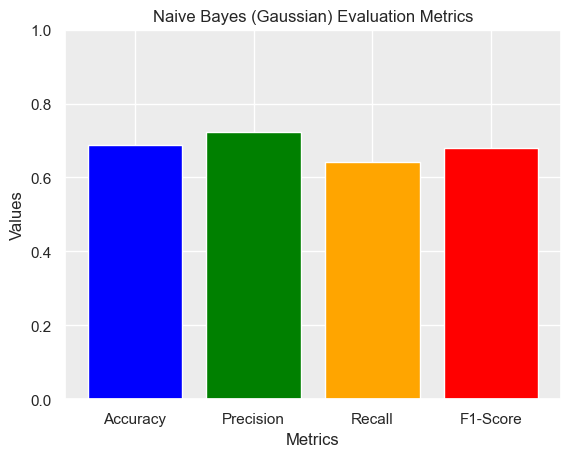

In [676]:
# Valores das métricas
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

# Avaliação do K-NN: impressão das métricas
print(classification_report(y_test, y_pred_nb))

# Imprime as métricas individualmente
print('Accuracy Score : ' + str(round(accuracy_score(y_test, y_pred_nb), 3)))
print('Precision Score : ' + str(round(precision_score(y_test, y_pred_nb), 3)))
print('Recall Score : ' + str(round(recall_score(y_test, y_pred_nb), 3)))
print('F-Score : ' + str(round(f1_score(y_test, y_pred_nb), 3)))

# Criando um gráfico de barras para as métricas
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [accuracy, precision, recall, f1]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Naive Bayes (Gaussian) Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)  # Ajuste o limite y conforme necessário (0 a 1 para métricas de proporção)
plt.show()


### XGBoost

XGBoost (Extreme Gradient Boosting) é um algoritmo de aprendizado de máquina baseado em árvores de decisão que destaca-se por sua eficiência, escalabilidade e capacidade de lidar com conjuntos de dados grandes, tornando-o amplamente utilizado em competições de ciência de dados.

[[1982  340]
 [ 210 2246]]


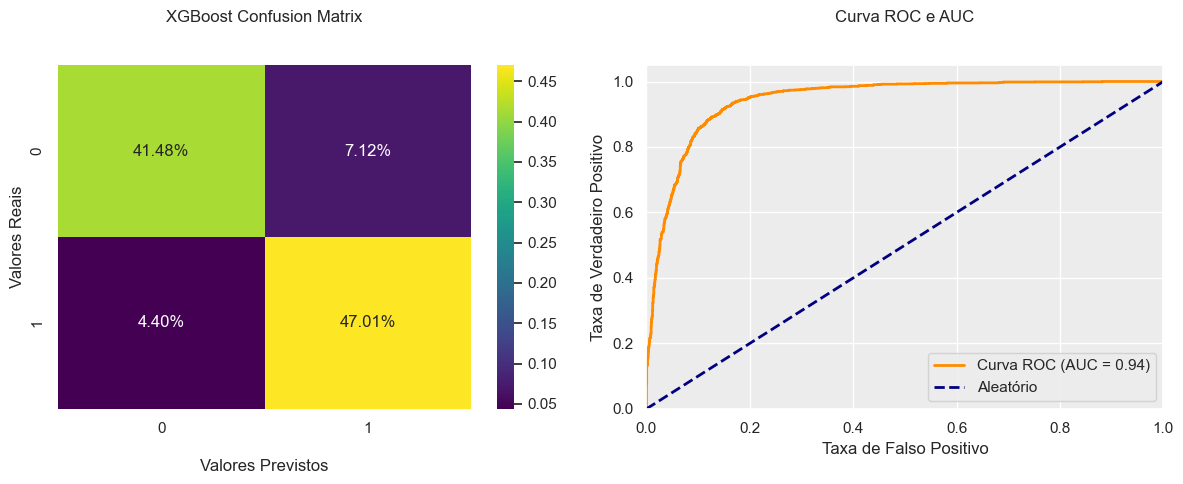

In [677]:
from xgboost import XGBClassifier

# Implementação do algoritmo XGBClassifier
xgbc = XGBClassifier(use_label_encoder=False)
xgbc.fit(x_train, y_train)
y_pred_xgbc = xgbc.predict(x_test)

# Avaliação do XGBClassifier: impressão da matriz de confusão
cf_matrix_xgbc = confusion_matrix(y_test, y_pred_xgbc)
print(cf_matrix_xgbc)

# Plotando a Matriz de Confusão com paleta de cores amigável para daltônicos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotando a Matriz de Confusão
sns.heatmap(cf_matrix_xgbc/np.sum(cf_matrix_xgbc), annot=True, fmt='.2%', cmap='viridis', ax=axes[0])
axes[0].set_title('XGBoost Confusion Matrix\n\n')
axes[0].set_xlabel('\nValores Previstos')
axes[0].set_ylabel('Valores Reais')
axes[0].xaxis.set_ticklabels(['0', '1'])
axes[0].yaxis.set_ticklabels(['0', '1'])

# Calculando as probabilidades para a classe positiva
y_probs_xgbc = xgbc.predict_proba(x_test)[:, 1]

# Calculando as curvas ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_xgbc)
roc_auc = auc(fpr, tpr)

# Plotando a Curva ROC e AUC
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatório')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Taxa de Falso Positivo')
axes[1].set_ylabel('Taxa de Verdadeiro Positivo')
axes[1].set_title('Curva ROC e AUC\n\n')
axes[1].legend(loc='lower right')

# Exibindo as visualizações
plt.tight_layout()
plt.show()


              precision    recall  f1-score   support

           0       0.90      0.85      0.88      2322
           1       0.87      0.91      0.89      2456

    accuracy                           0.88      4778
   macro avg       0.89      0.88      0.88      4778
weighted avg       0.89      0.88      0.88      4778

Accuracy Score : 0.885
Precision Score : 0.869
Recall Score : 0.914
F-Score : 0.891


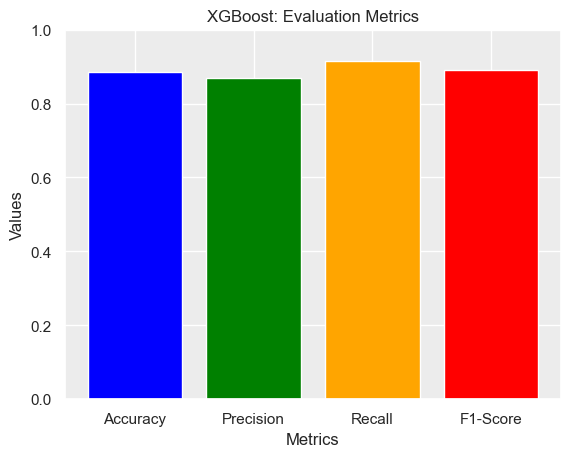

In [678]:
# Valores das métricas
accuracy = accuracy_score(y_test, y_pred_xgbc)
precision = precision_score(y_test, y_pred_xgbc)
recall = recall_score(y_test, y_pred_xgbc)
f1 = f1_score(y_test, y_pred_xgbc)

# Avaliação do K-NN: impressão das métricas
print(classification_report(y_test, y_pred_xgbc))

# Imprime as métricas individualmente
print('Accuracy Score : ' + str(round(accuracy_score(y_test, y_pred_xgbc), 3)))
print('Precision Score : ' + str(round(precision_score(y_test, y_pred_xgbc), 3)))
print('Recall Score : ' + str(round(recall_score(y_test, y_pred_xgbc), 3)))
print('F-Score : ' + str(round(f1_score(y_test, y_pred_xgbc), 3)))

# Criando um gráfico de barras para as métricas
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [accuracy, precision, recall, f1]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.title('XGBoost: Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)  # Ajuste o limite y conforme necessário (0 a 1 para métricas de proporção)
plt.show()


### Random Forest

O Random Forest é um ensemble de árvores de decisão, treinadas em subconjuntos aleatórios dos dados, que combina suas previsões para melhorar a robustez e reduzir o overfitting em problemas de classificação e regressão.

[[2079  243]
 [  73 2383]]


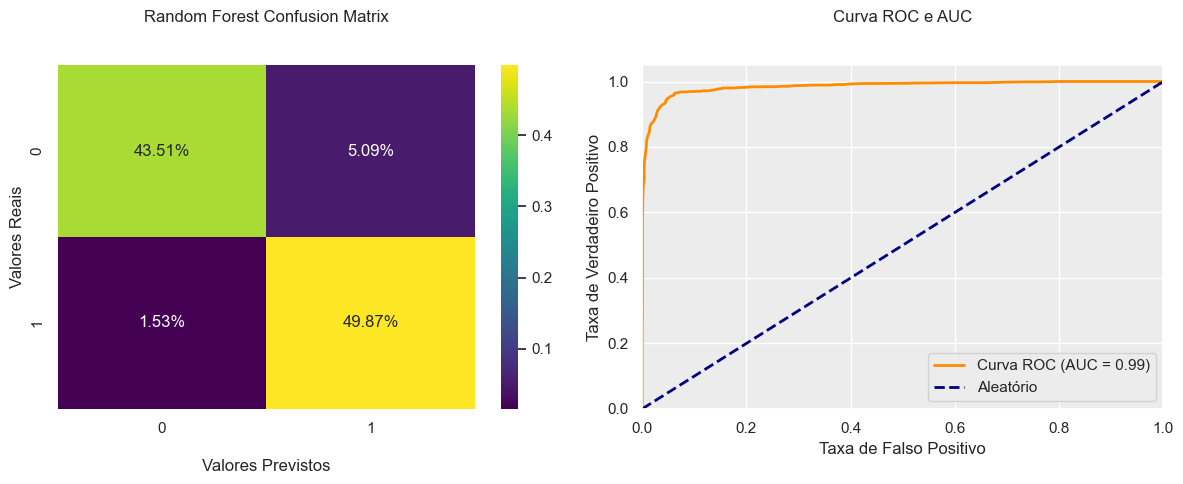

In [679]:
from sklearn.ensemble import RandomForestClassifier

# Implementação do algoritmo RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)

# Avaliação do RandomForestClassifier: impressão da matriz de confusão
cf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
print(cf_matrix_rfc)

# Plotando a Matriz de Confusão com paleta de cores amigável para daltônicos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotando a Matriz de Confusão
sns.heatmap(cf_matrix_rfc/np.sum(cf_matrix_rfc), annot=True, fmt='.2%', cmap='viridis', ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix\n\n')
axes[0].set_xlabel('\nValores Previstos')
axes[0].set_ylabel('Valores Reais')
axes[0].xaxis.set_ticklabels(['0', '1'])
axes[0].yaxis.set_ticklabels(['0', '1'])

# Calculando as probabilidades para a classe positiva
y_probs_rfc = rfc.predict_proba(x_test)[:, 1]

# Calculando as curvas ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rfc)
roc_auc = auc(fpr, tpr)

# Plotando a Curva ROC e AUC
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatório')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Taxa de Falso Positivo')
axes[1].set_ylabel('Taxa de Verdadeiro Positivo')
axes[1].set_title('Curva ROC e AUC\n\n')
axes[1].legend(loc='lower right')

# Exibindo as visualizações
plt.tight_layout()
plt.show()


              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2322
           1       0.91      0.97      0.94      2456

    accuracy                           0.93      4778
   macro avg       0.94      0.93      0.93      4778
weighted avg       0.94      0.93      0.93      4778

Accuracy Score : 0.934
Precision Score : 0.907
Recall Score : 0.97
F-Score : 0.938


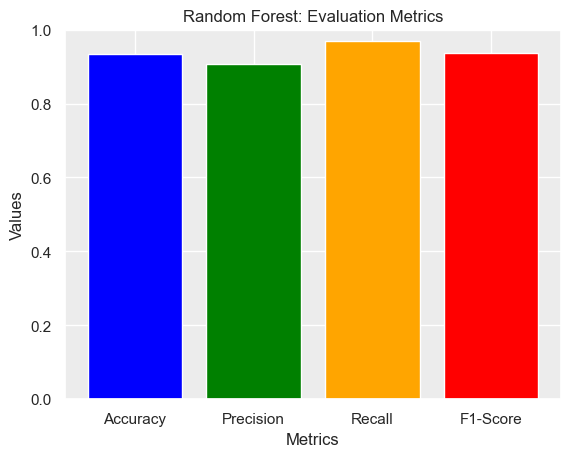

In [680]:
# Valores das métricas
accuracy = accuracy_score(y_test, y_pred_rfc)
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc)

# Avaliação do K-NN: impressão das métricas
print(classification_report(y_test, y_pred_rfc))

# Imprime as métricas individualmente
print('Accuracy Score : ' + str(round(accuracy_score(y_test, y_pred_rfc), 3)))
print('Precision Score : ' + str(round(precision_score(y_test, y_pred_rfc), 3)))
print('Recall Score : ' + str(round(recall_score(y_test, y_pred_rfc), 3)))
print('F-Score : ' + str(round(f1_score(y_test, y_pred_rfc), 3)))

# Criando um gráfico de barras para as métricas
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [accuracy, precision, recall, f1]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Random Forest: Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)  # Ajuste o limite y conforme necessário (0 a 1 para métricas de proporção)
plt.show()

## CONCLUSÃO


Best Accuracy Model: Random Forest
Worst Accuracy Model: K-NN

Best Precision Model: Random Forest
Worst Precision Model: K-NN

Best Recall Model: Random Forest
Worst Recall Model: Naive Bayes

Best F1 Score Model: Random Forest
Worst F1 Score Model: Naive Bayes

Metrics Summary:
Model          K-NN  Naive Bayes   XGBoost  Random Forest
Accuracy   0.675178     0.688991  0.884889       0.935956
Precision  0.657821     0.722681  0.868523       0.909992
Recall     0.767101     0.640879  0.914495       0.971498
F1 Score   0.708271     0.679327  0.890916       0.939740


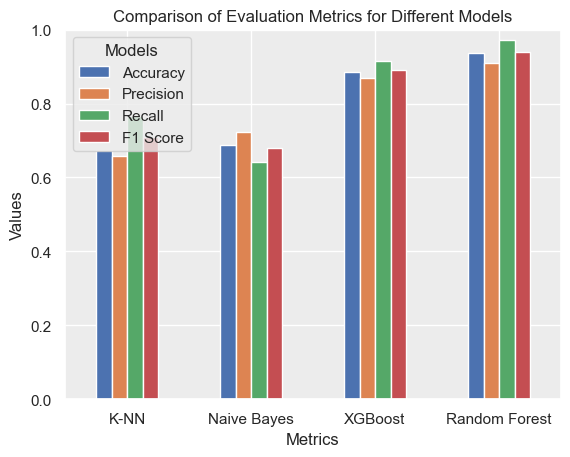

In [684]:
# Comparando as métricas e identificando o melhor e pior modelo para cada métrica
best_accuracy_model = df_metrics.loc[df_metrics['Accuracy'].idxmax()]['Model']
worst_accuracy_model = df_metrics.loc[df_metrics['Accuracy'].idxmin()]['Model']

best_precision_model = df_metrics.loc[df_metrics['Precision'].idxmax()]['Model']
worst_precision_model = df_metrics.loc[df_metrics['Precision'].idxmin()]['Model']

best_recall_model = df_metrics.loc[df_metrics['Recall'].idxmax()]['Model']
worst_recall_model = df_metrics.loc[df_metrics['Recall'].idxmin()]['Model']

best_f1_model = df_metrics.loc[df_metrics['F1 Score'].idxmax()]['Model']
worst_f1_model = df_metrics.loc[df_metrics['F1 Score'].idxmin()]['Model']

# Imprimindo apenas as informações resumidas
print("\nBest Accuracy Model:", best_accuracy_model)
print("Worst Accuracy Model:", worst_accuracy_model)

print("\nBest Precision Model:", best_precision_model)
print("Worst Precision Model:", worst_precision_model)

print("\nBest Recall Model:", best_recall_model)
print("Worst Recall Model:", worst_recall_model)

print("\nBest F1 Score Model:", best_f1_model)
print("Worst F1 Score Model:", worst_f1_model)

# Resumo das métricas
metrics_summary = df_metrics.set_index('Model').transpose()
print("\nMetrics Summary:")
print(metrics_summary)

# Plotando um gráfico de barras para as métricas
df_metrics.set_index('Model').plot(kind='bar', rot=0)
plt.title('Comparison of Evaluation Metrics for Different Models')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)  # Ajuste o limite y conforme necessário (0 a 1 para métricas de proporção)
plt.legend(title='Models')
plt.show()


Depois de um longo trabalho de análise, tratamento devido aos dados, conseguimos uma boa (e não perfeita) performance no último modelo de Random Forest, com boas métricas e você pode ver pela curva ROC e AUC que logo o modelo se ajustou aos dados.

Já o K-NN e o Naive Bayes tiveram performances ruins em suas métricas e demoraram para se ajustarem aos dados, mas, é preciso dizer que para esse exemplo específico tivemos esses resultados. Não é uma regra, apenas performaram desta maneira nesse conjunto de dados.

# FIM

Mais um projeto de boa relevância e de nível intermediário>avançado para treinar diversas técnicas, espero que seja relevante e em caso de dúvidas é só me chamar.